# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [83]:
# Checking the number of mice.
combined_mouse_study_data["Mouse ID"].nunique()


249

In [84]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_data

array(['g989'], dtype=object)

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_g989 = combined_mouse_study_data.loc[combined_mouse_study_data['Mouse ID'] == 'g989']
dup_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dup_data = combined_mouse_study_data[combined_mouse_study_data["Mouse ID"].isin(dup_data) == False]
clean_dup_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [87]:
# Checking the number of mice in the clean DataFrame.
clean_dup_data["Mouse ID"].nunique()

248

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_stats = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

#Creating Dataframe

drug_reg_stats = pd.DataFrame({"Mean Tumor Volume": mean_stats,
                               "Median Tumor Volume": median_stats,
                               "Tumor Volume Variance": variance_stats,
                               "Tumor Volume Std. Dev.": std_dev_stats,
                               "Tumor Volume Std. Err.": std_err_stats})

drug_reg_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

stats_aggregate = combined_mouse_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stats_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [90]:
#define total number of timepoints administered to mouse for each regimen drug 
count_mouse_reg = combined_mouse_study_data["Drug Regimen"].value_counts()
count_mouse_reg

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

In [91]:
#listing the available drugs
drug_reg = combined_mouse_study_data["Drug Regimen"].unique()
drug_reg

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

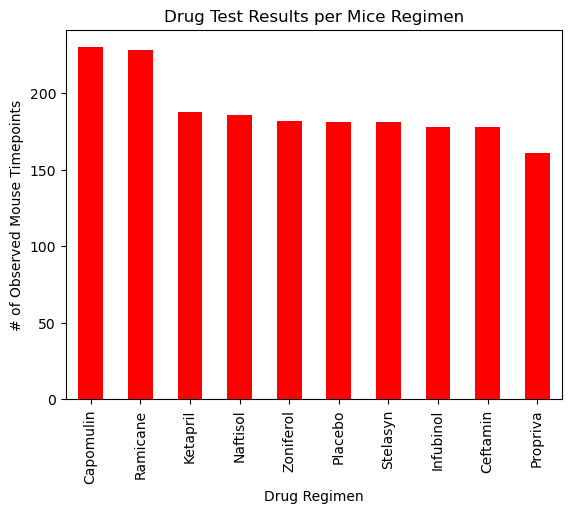

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_reg_bar_chart = count_mouse_reg.plot.bar(color="red")
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Test Results per Mice Regimen")
plt.show()

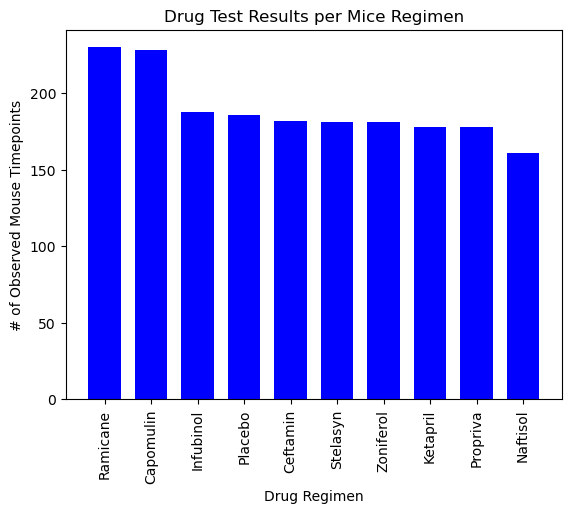

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_reg, count_mouse_reg, color ='blue', width = 0.7, align="center")

plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Test Results per Mice Regimen")
plt.show()


In [94]:
#Define number of unique mouse with each associated with it's sex
gender_mouse = clean_dup_data["Sex"].value_counts()
gender_mouse

Sex
Male      958
Female    922
Name: count, dtype: int64

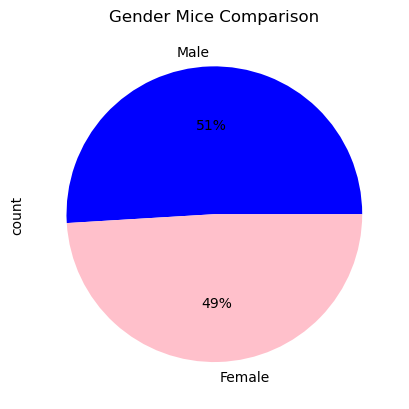

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

color = ['blue','pink']
plt.title("Gender Mice Comparison")
gender_mouse.plot.pie(autopct='%1.0f%%', colors=color)
plt.show()


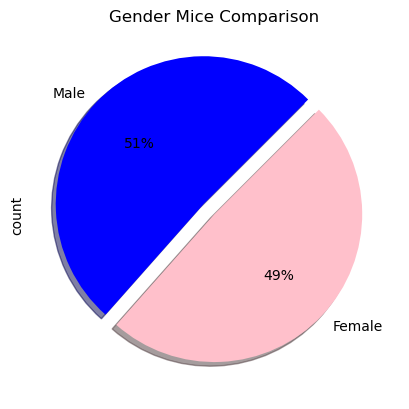

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_label = ['Male', 'Female']
color = ['blue','pink']
explode_chart = [0.1, 0]
plot_gender_chart_py = gender_mouse.plot.pie(autopct='%1.0f%%', colors=color, 
                                             labels=gender_label,shadow=True, startangle=45, explode=explode_chart)
plt.title("Gender Mice Comparison")
plt.show()


## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#defining four drug regimine variables to assign index to those specific drug regimine 

capomulin_drug_df = clean_dup_data.loc[clean_dup_data["Drug Regimen"] == "Capomulin"]
ramicane_drug_df = clean_dup_data.loc[clean_dup_data["Drug Regimen"] == "Ramicane"]
infubinol_drug_df = clean_dup_data.loc[clean_dup_data["Drug Regimen"] == "Infubinol"]
ceftamin_drug_df = clean_dup_data.loc[clean_dup_data["Drug Regimen"] == "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
capomulin_max_timepoint = capomulin_drug_df.groupby(["Mouse ID"]).max()["Timepoint"]
capomulin_volume = pd.DataFrame(capomulin_max_timepoint)

#Ramicane
ramicane_max_timepoint = ramicane_drug_df.groupby(["Mouse ID"]).max()["Timepoint"]
ramicane_volume = pd.DataFrame(ramicane_max_timepoint)

#Infubinol
infubinol_max_timepoint = infubinol_drug_df.groupby(["Mouse ID"]).max()["Timepoint"]
infubinol_volume = pd.DataFrame(infubinol_max_timepoint)

#Ceftamin
ceftamin_max_timepoint = ceftamin_drug_df.groupby(["Mouse ID"]).max()["Timepoint"]
ceftamin_volume = pd.DataFrame(ceftamin_max_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge_df = pd.merge(capomulin_volume, clean_dup_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge_df  = pd.merge(ramicane_volume, clean_dup_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge_df = pd.merge(infubinol_volume, clean_dup_data,on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge_df = pd.merge(ceftamin_volume, clean_dup_data, on=("Mouse ID","Timepoint"),how="left")

In [98]:
capomulin_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [99]:
ramicane_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [100]:
infubinol_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [101]:
infubinol_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [102]:
#create an list of the drug treatments for "Capomulin", "Ramicane", "Infubinol", "Ceftamin"
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#merge the drug list data with the clean_dup_data
treatment_merge_df = combined_mouse_study_data[combined_mouse_study_data["Drug Regimen"].isin(treatment_list)]
treatment_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [103]:
#tumor volume for each of the drug treatment from the last timepoint
timepoint_value = treatment_merge_df.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)",lambda x: x.iloc[-1]))
#test by reshaping dataframe
timepoint_value = timepoint_value.stack(level=0).unstack(level=0)
for timepoint in timepoint_value:
    print(timepoint)

Capomulin
Ceftamin
Infubinol
Ramicane


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset  
    # Determine outliers using upper and lower bounds
treatment_count = 0

for treatment in treatment_list:
    quartiles = timepoint_value[treatment].quantile([.25,.5,.75]).round(2)
    lowerq_value = quartiles[0.25].round(2)
    upperq_value = quartiles[0.75].round(2)
    iqr_value = round(upperq_value - lowerq_value , 2)
    lower_bound_value = round(lowerq_value - (1.5*iqr_value),2)
    upper_bound_value = round(upperq_value + (1.5*iqr_value),2)


    if treatment_count == 0:
        print(f"{treatment} potential outliers for upper value: {upper_bound_value} and lower value: {lower_bound_value}")
treatment_count += 1

Capomulin potential outliers for upper value: 51.83 and lower value: 20.71
Ramicane potential outliers for upper value: 54.31 and lower value: 17.91
Infubinol potential outliers for upper value: 82.75 and lower value: 36.83
Ceftamin potential outliers for upper value: 87.67 and lower value: 25.35


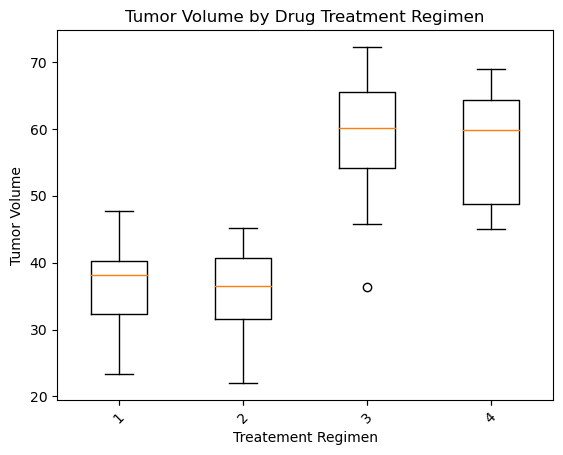

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for treatment in treatment_list:
    boxplot_list.append(list(timepoint_value[treatment].dropna()))
    
fig = plt.figure()
plt.xlabel("Treatement Regimen")
plt.xticks([1,2,3,4], treatment_list, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Treatment Regimen")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

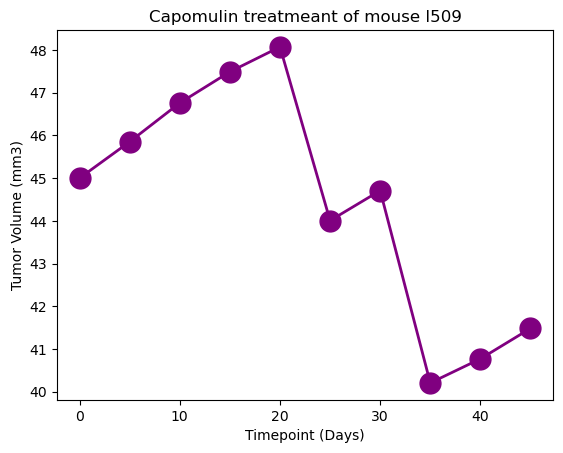

In [106]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line_plot = capomulin_drug_df.loc[capomulin_drug_df["Mouse ID"] == "l509"]

x_timepoint = capomulin_line_plot["Timepoint"]
y_tumorsize = capomulin_line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_timepoint, y_tumorsize,linewidth=2, markersize=15,marker="o",color="purple", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

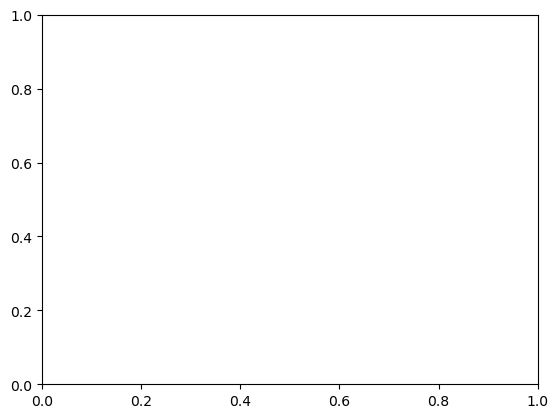

In [113]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
average_capomulin_vol = capomulin_drug_df.groupby(capomulin_drug_df["Mouse ID"]).mean()["Tumor Volume (mm3)"]

marker_size = 15
plt.scatter(average_capomulin_vol['Weight (g)'], average_capomulin_vol['Tumor Volume (mm3)'], color="red")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

In [108]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

calc_correlation = st.pearsonr(average_capomulin_vol['Weight (g)'], average_capomulin_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {round(calc_correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr)= linregress(average_capomulin_vol['Weight (g)'], average_capomulin_vol['Tumor Volume (mm3)'])
line_slope_regress = {average_capomulin_vol['Tumor Volume (mm3)']} * slope + intercept
line_equation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.scatter(average_capomulin_vol['Weight (g)'], average_capomulin_vol['Tumor Volume (mm3)'],color='g')
plt.plot(average_capomulin_vol['Weight (g)'], regress_values, color='red')
plt.annotate(line_equation,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show() 

NameError: name 'average_capomulin_vol' is not defined